In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load dataset
df = pd.read_csv("/content/sample_data/sales_data_with_discounts.csv")

In [ ]:
#Quick look
print(df.head())
print(df.info())
print(df.describe(include="all"))

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
<class '

In [ ]:
#Select only numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", num_cols)

Numeric columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [ ]:
#Mean, median, std
means = df[num_cols].mean()
medians = df[num_cols].median()
stds = df[num_cols].std()

In [ ]:
print("\nMeans:\n", means)
print("\nMedians:\n", medians)
print("\nStandard deviations:\n", stds)


Means:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Medians:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Standard deviations:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


In [ ]:
#Mode can be multiple; take first row
modes = df[num_cols].mode().iloc[0]
print("\nModes:\n", modes)


Modes:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64


In [ ]:
#Optionally put into one table
summary_stats = pd.DataFrame({
    "mean": means,
    "median": medians,
    "mode": modes,
    "std": stds
})
print("\nSummary stats:\n", summary_stats)
summary_stats.to_csv("summary_stats.csv")


Summary stats:
                            mean       median          mode           std
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


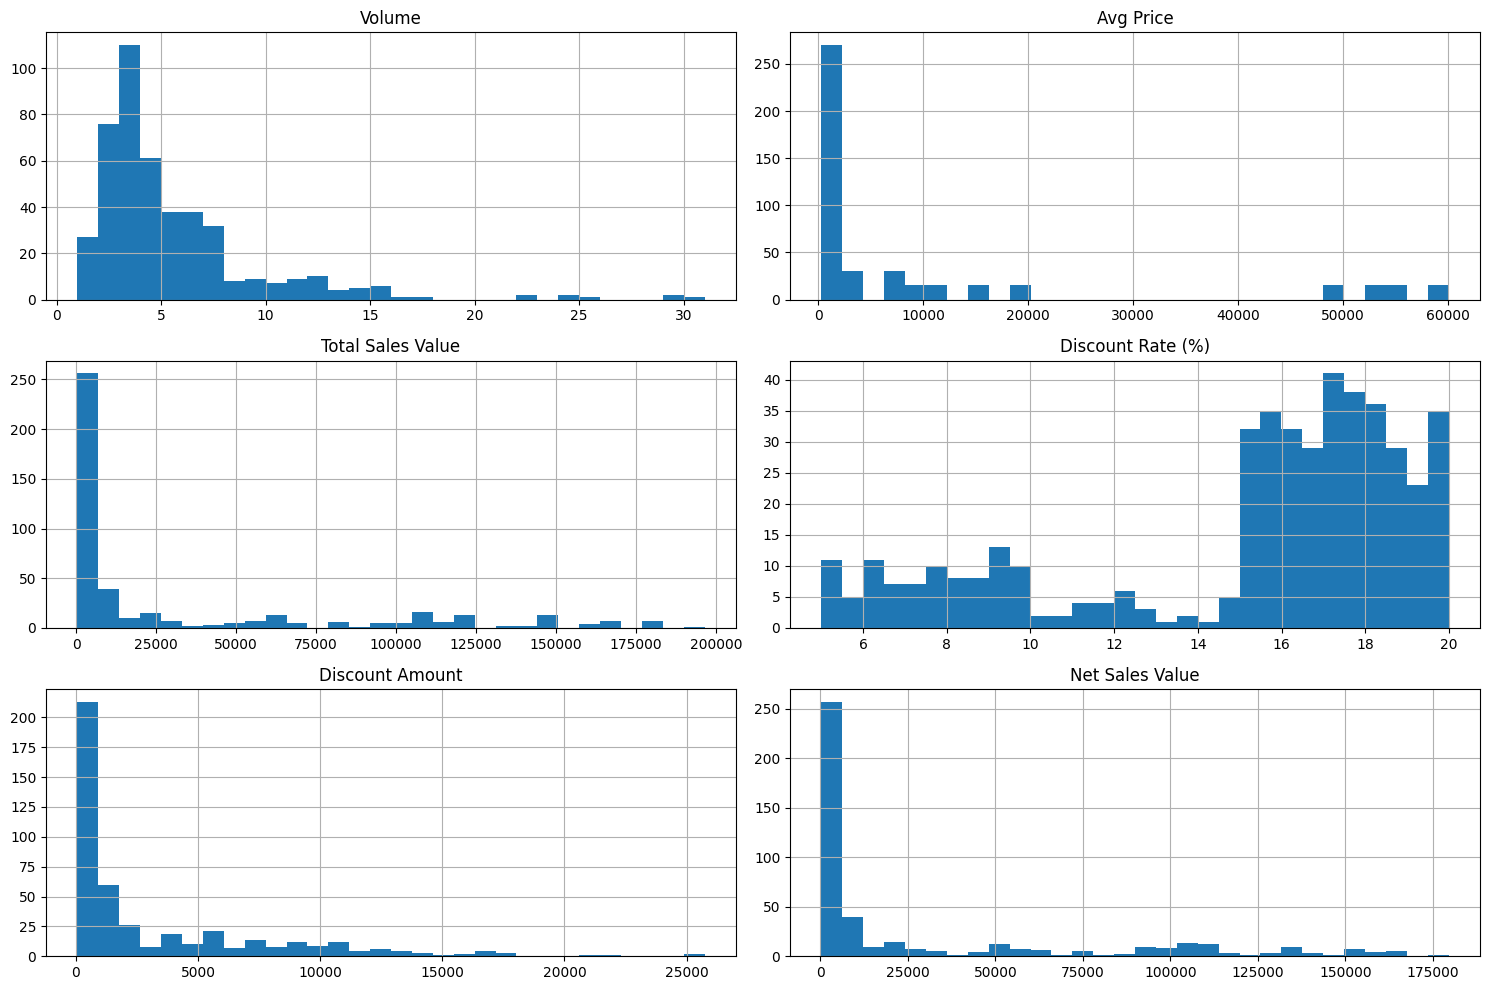

In [ ]:
#Histograms
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.savefig("histograms_numeric.png")
plt.show()

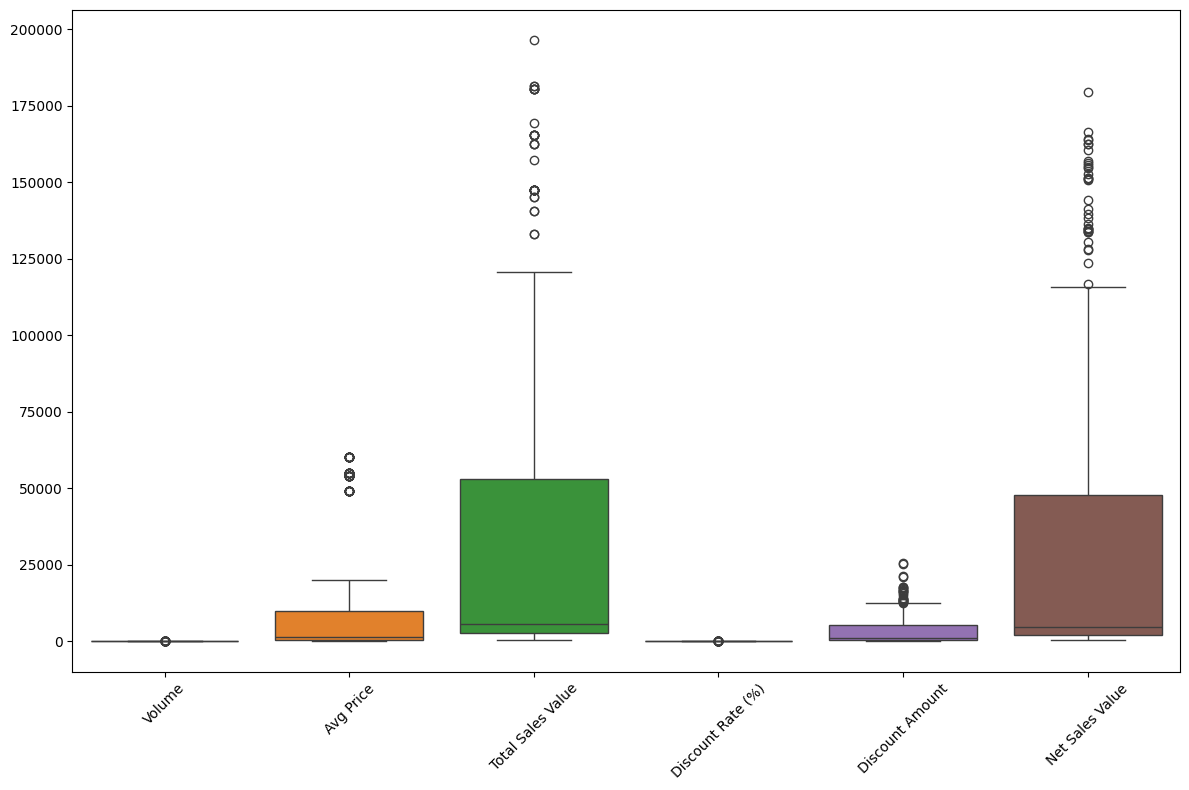

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("boxplots_numeric.png")
plt.show()

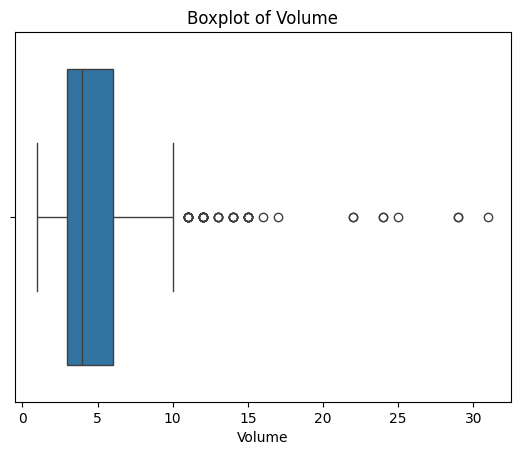

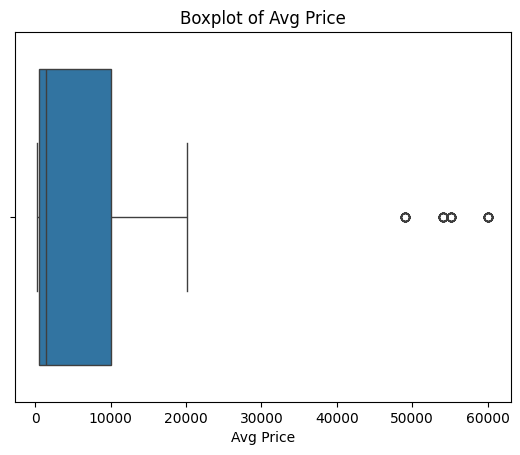

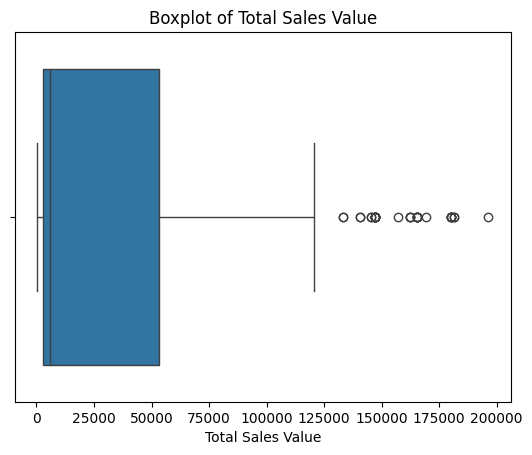

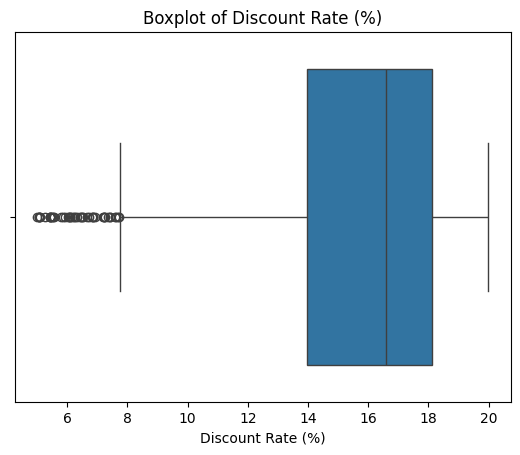

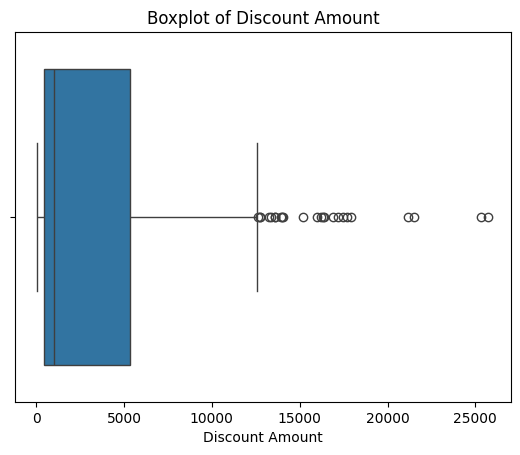

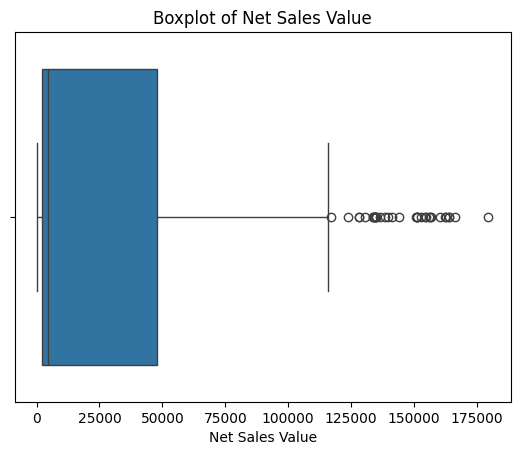

In [ ]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.savefig(f"box_{col}.png")
    plt.show()

In [ ]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


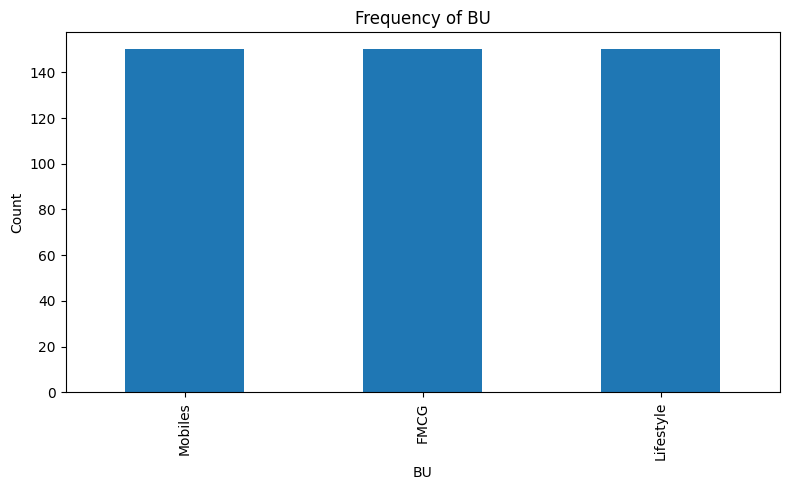

In [ ]:
#Example for BU
plt.figure(figsize=(8, 5))
df['BU'].value_counts().plot(kind='bar')
plt.title("Frequency of BU")
plt.xlabel("BU")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("bar_BU.png")
plt.show()

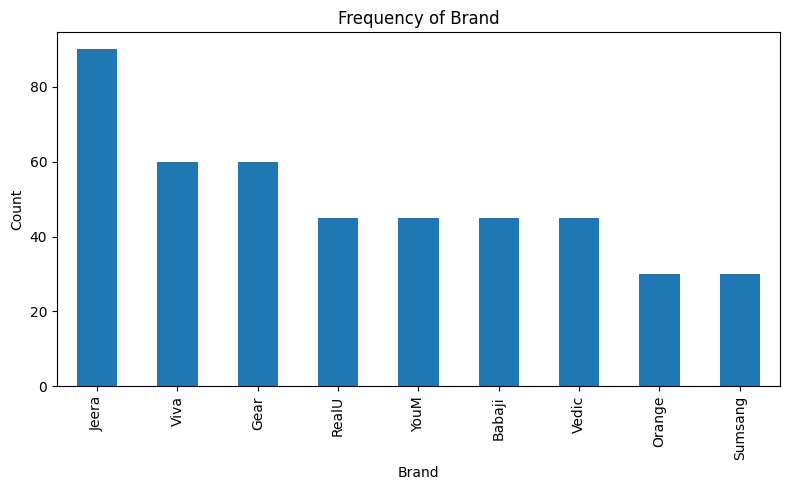

In [ ]:
#Example for Brand
plt.figure(figsize=(8, 5))
df['Brand'].value_counts().plot(kind='bar')
plt.title("Frequency of Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("bar_Brand.png")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
print(df_std[num_cols].head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


In [ ]:
#Save standardized data if needed
df_std.to_csv("sales_data_standardized.csv", index=False)

In [ ]:
col = 'Net Sales Value'  #change if column name slightly different, check df.columns
plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'Original Net Sales Value')

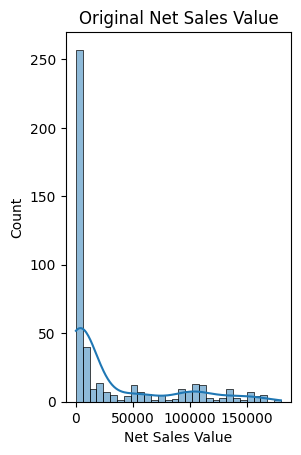

In [ ]:
plt.subplot(1,2,1)
sns.histplot(df[col], bins=30, kde=True)
plt.title(f"Original {col}")

Text(0.5, 1.0, 'Standardized Net Sales Value')

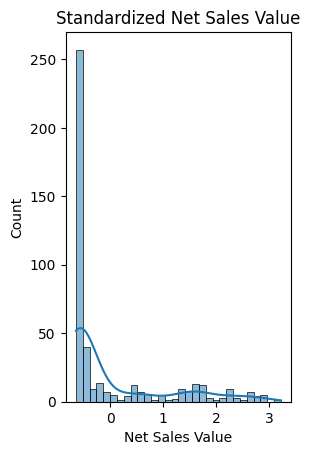

In [ ]:
plt.subplot(1,2,2)
sns.histplot(df_std[col], bins=30, kde=True)
plt.title(f"Standardized {col}")

In [ ]:
plt.tight_layout()
plt.savefig(f"standardization_{col}.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
#Categorical columns again
cat_cols = df.select_dtypes(exclude=[np.number]).columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [ ]:
#One-hot encoding
df_dummies = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df_dummies.head())
print(df_dummies.shape)

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [ ]:
df_dummies.to_csv("sales_data_dummies.csv", index=False)